In [1]:
# import useful libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

# setting options
pd.options.mode.chained_assignment = None
sns.set(font_scale=1.2)


In [4]:
# reading data file
data = pd.read_csv('menu.csv', index_col=0)
data = data.reset_index()

In [111]:
# info for every single column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 26 columns):
Category                         260 non-null object
Item                             260 non-null object
Serving Size                     260 non-null object
Calories                         260 non-null int64
Calories from Fat                260 non-null int64
Total Fat                        260 non-null float64
Total Fat (% Daily Value)        260 non-null int64
Saturated Fat                    260 non-null float64
Saturated Fat (% Daily Value)    260 non-null int64
Trans Fat                        260 non-null float64
Cholesterol                      260 non-null int64
Cholesterol (% Daily Value)      260 non-null int64
Sodium                           260 non-null int64
Sodium (% Daily Value)           260 non-null int64
Carbohydrates                    260 non-null int64
Carbohydrates (% Daily Value)    260 non-null int64
Dietary Fiber                    260 non-null int64
Di

In [5]:
# statistic information about dataset
data.describe(include='all')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Mocha with Nonfat Milk (Small),16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


This descriptions says that Mocha with Nonfat Milk (Small) is the top most serving item with size 16 fl oz cup in Coffee & Tea Category 

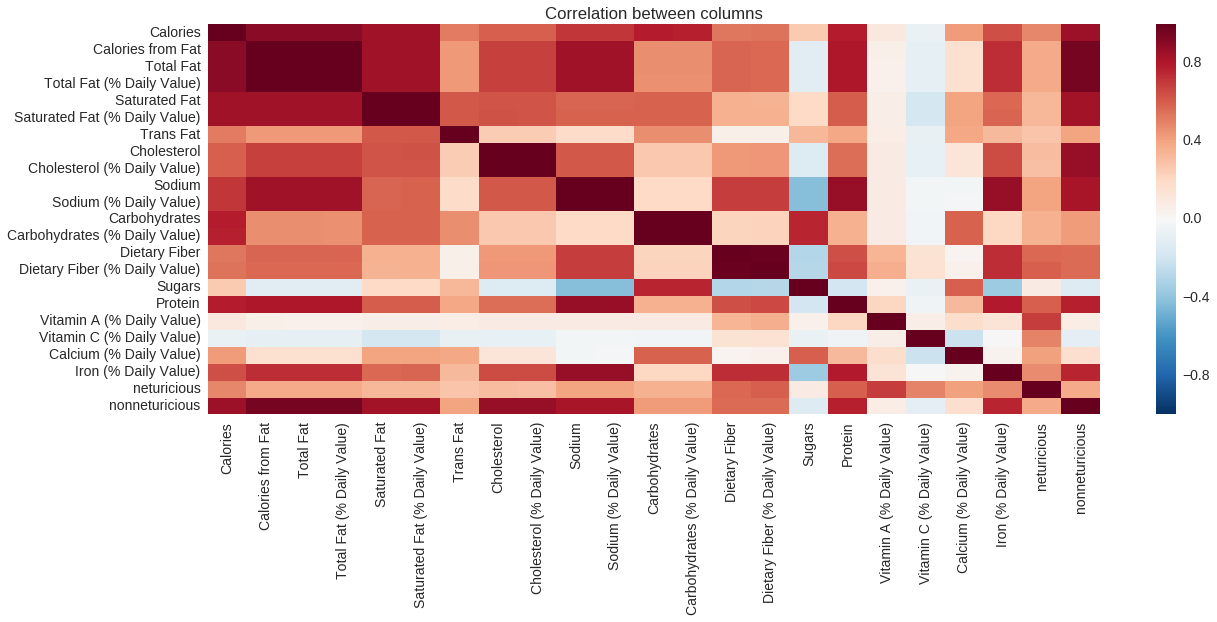

In [79]:
fig, ax = plt.subplots(figsize=(20, 7))

sns.heatmap(data.corr(), ax=ax)
ax.set_title('Correlation between columns')

This tells us about the correlation between columns respect to each other. The left most part of the heatmap shows
the relations between Calories, Total Fat, Saturated Fat columns which means these columns have an direct impact on
each other. Below that, one can observe that the correlation amongst Total Fat, Cholesterol, Sodium is also very high
which means one will definitely increase when other will get increased.

The same things goes between Calories and Carbohydrates. In the right most part of the heatmap, one can observe that
Sodium is also related with Protein & Iron.

In [113]:
neturicious = ['Protein', 'Vitamin A (% Daily Value)',
               'Dietary Fiber', 'Vitamin C (% Daily Value)',
               'Calcium (% Daily Value)', u'Iron (% Daily Value)']

nonneturicious = ['Total Fat', 'Calories from Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol']

data['neturicious'] = data['Protein'] + data['Vitamin A (% Daily Value)'] + data['Vitamin C (% Daily Value)'] + data['Dietary Fiber'] + data['Calcium (% Daily Value)'] + data['Iron (% Daily Value)']
data['nonneturicious'] = data['Total Fat'] + data['Calories from Fat'] + data['Saturated Fat'] + data['Trans Fat'] + data['Cholesterol']


The main motive behind this analysis is to show users, what to choose or not to choose for eat in macd. I have divided this dataset into two parts, Neutricious Food and Non-Neutricious Food. 

I have added some columns under this observation and trying to provide top 10 Neutricious and Non-Neutricious Food item below.

I believe after seeing this analysis everyone will follow to choose Neutricious Food always.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

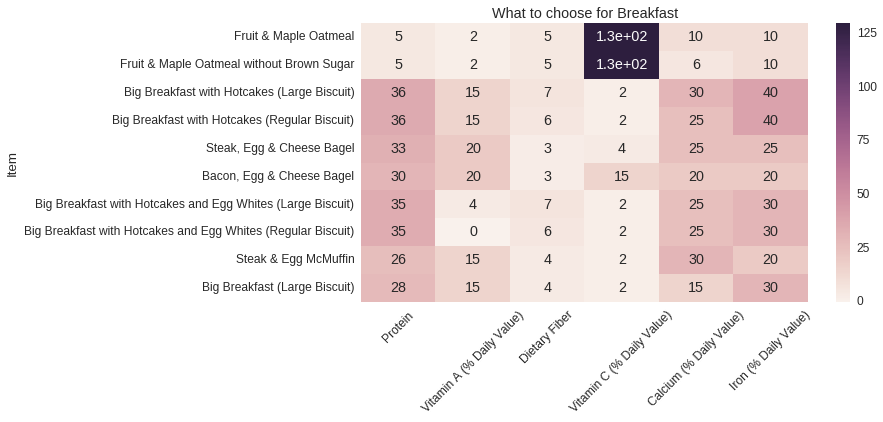

In [114]:
# selecting Breakfast category to show neutricious food

df = data[data['Category'] == 'Breakfast']
df = df.groupby(['Item']).sum().sort_values(by='neturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[neturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What to choose for Breakfast')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

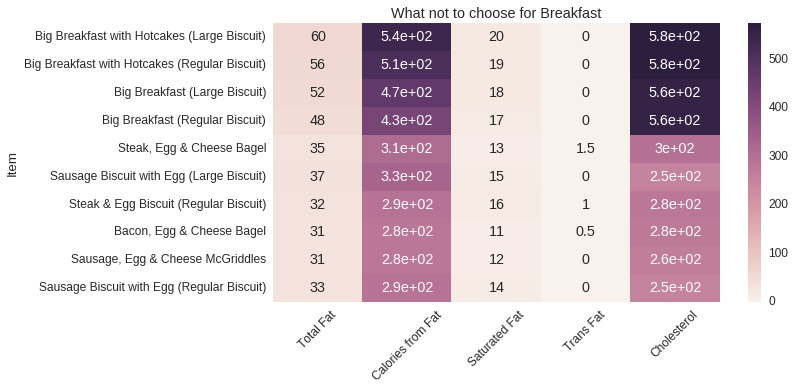

In [115]:
# selecting Breakfast category to show non-neutricious food

df = data[data['Category'] == 'Breakfast']
df = df.groupby(['Item']).sum().sort_values(by='nonneturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[nonneturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What not to choose for Breakfast')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

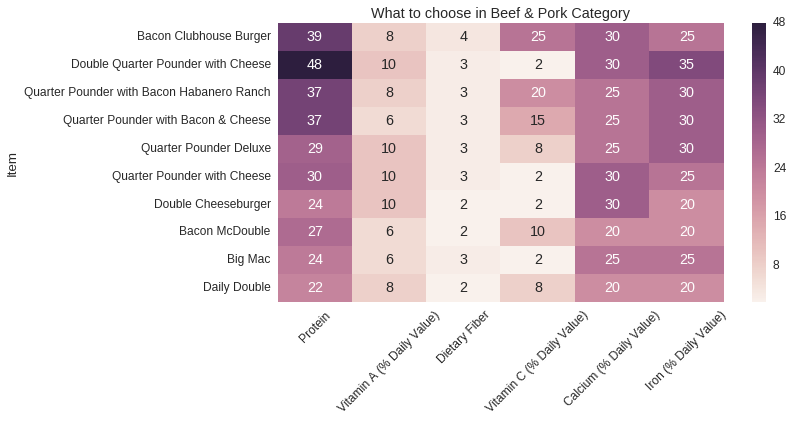

In [119]:
# selecting Beef & Pork category to show neutricious food

df = data[data['Category'] == 'Beef & Pork']
# removing this item because of unicode error if any
df = df[df['Item'] != 'Jalapeño Double']
df = df.groupby(['Item']).sum().sort_values(by='neturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[neturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What to choose in Beef & Pork Category')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

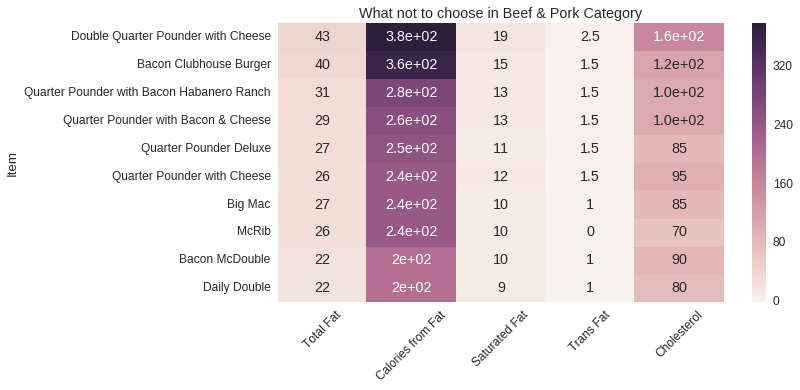

In [120]:
# selecting Beef & Pork category to show non-neutricious food

df = data[data['Category'] == 'Beef & Pork']
df = df[df['Item'] != 'Jalapeño Double']
df = df.groupby(['Item']).sum().sort_values(by='nonneturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[nonneturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What not to choose in Beef & Pork Category')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

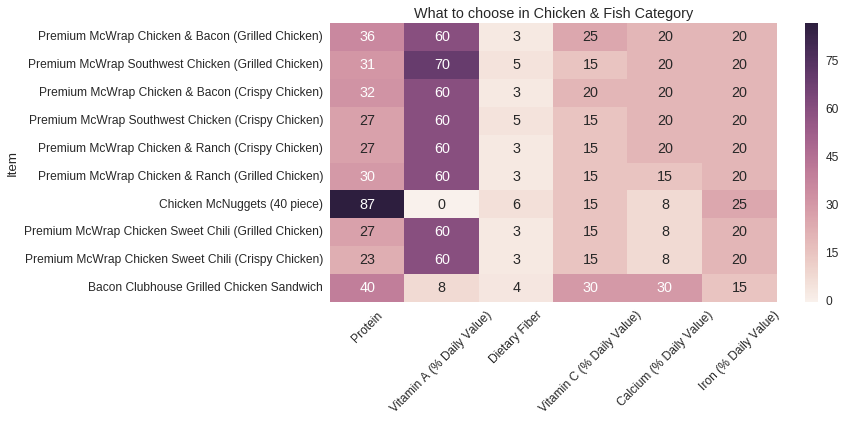

In [121]:
# selecting Chicken & Fish category to show neutricious food

df = data[data['Category'] == 'Chicken & Fish']
df = df.groupby(['Item']).sum().sort_values(by='neturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[neturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What to choose in Chicken & Fish Category')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

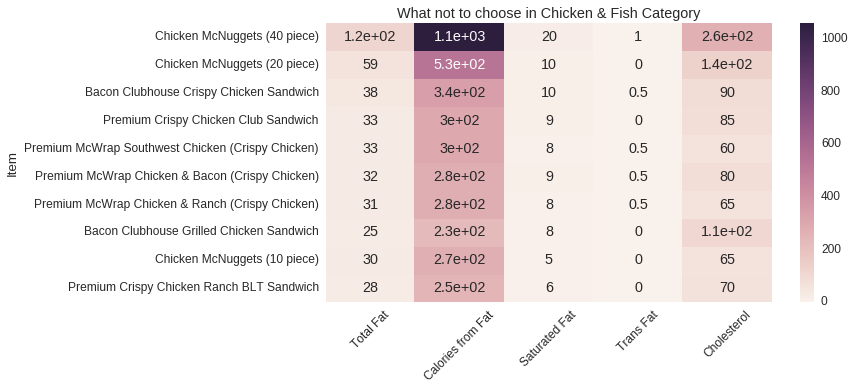

In [122]:
# selecting Chicken & Fish category to show non-neutricious food

df = data[data['Category'] == 'Chicken & Fish']
df = df.groupby(['Item']).sum().sort_values(by='nonneturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[nonneturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What not to choose in Chicken & Fish Category')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

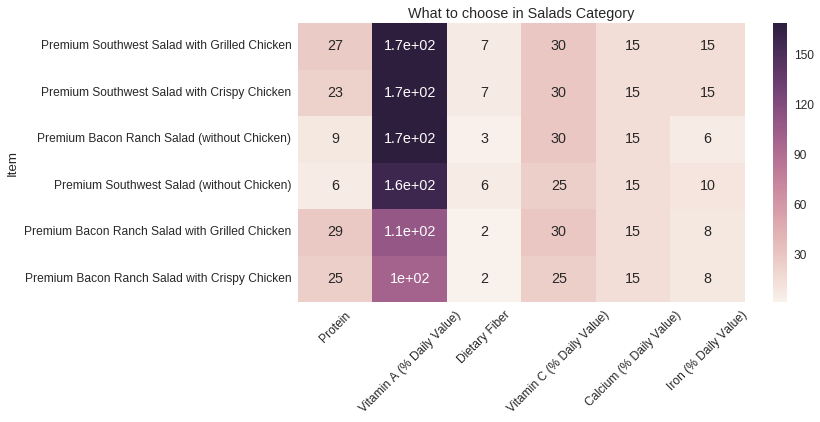

In [123]:
# selecting Salads category to show neutricious food

df = data[data['Category'] == 'Salads']
df = df.groupby(['Item']).sum().sort_values(by='neturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[neturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What to choose in Salads Category')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

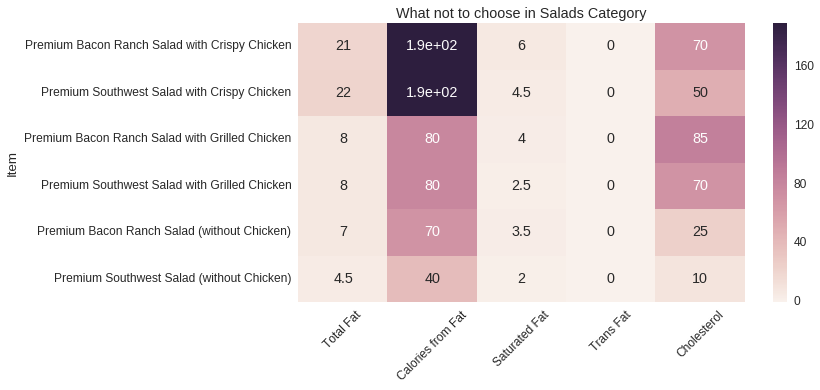

In [124]:
# selecting Salads category to show non-neutricious food

df = data[data['Category'] == 'Salads']
df = df.groupby(['Item']).sum().sort_values(by='nonneturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[nonneturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What not to choose in Salads Category')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

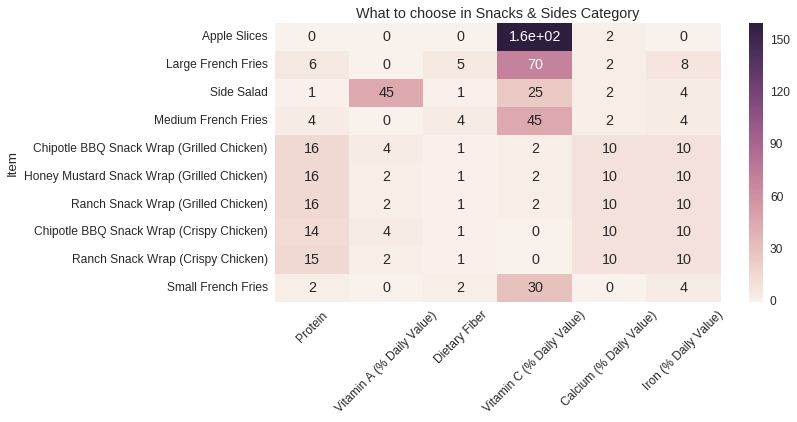

In [125]:
# selecting Snacks & Sides category to show neutricious food

df = data[data['Category'] == 'Snacks & Sides']
df = df.groupby(['Item']).sum().sort_values(by='neturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[neturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What to choose in Snacks & Sides Category')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

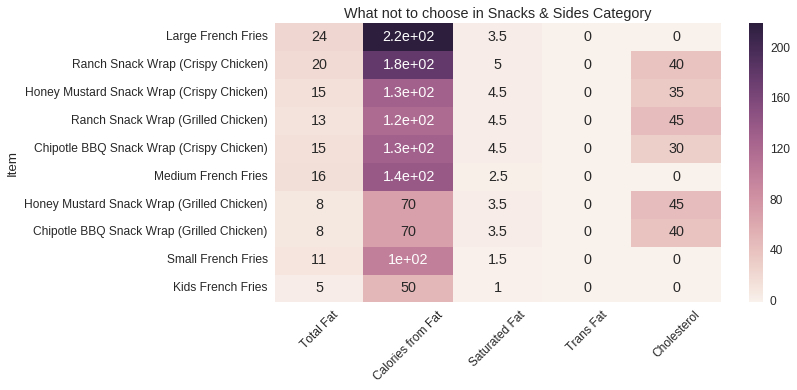

In [126]:
# selecting Snacks & Sides category to show non-neutricious food

df = data[data['Category'] == 'Snacks & Sides']
df = df.groupby(['Item']).sum().sort_values(by='nonneturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[nonneturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What not to choose in Snacks & Sides Category')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

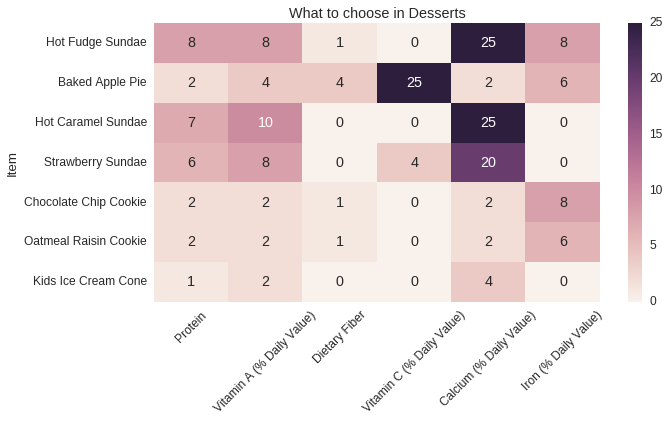

In [127]:
# selecting Desserts category to show neutricious food

df = data[data['Category'] == 'Desserts']
df = df.groupby(['Item']).sum().sort_values(by='neturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[neturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What to choose in Desserts')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

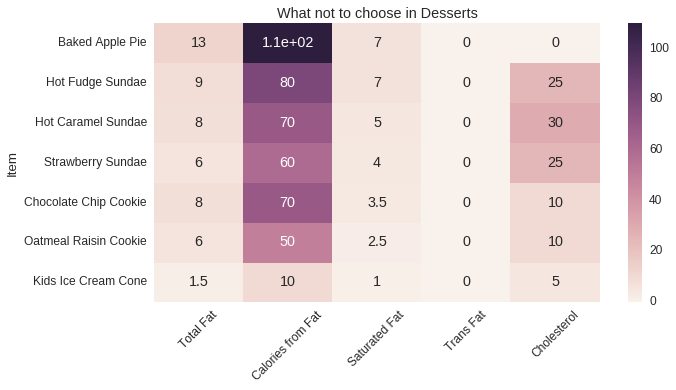

In [128]:
# selecting Desserts category to show non-neutricious food

df = data[data['Category'] == 'Desserts']
df = df.groupby(['Item']).sum().sort_values(by='nonneturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[nonneturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What not to choose in Desserts')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

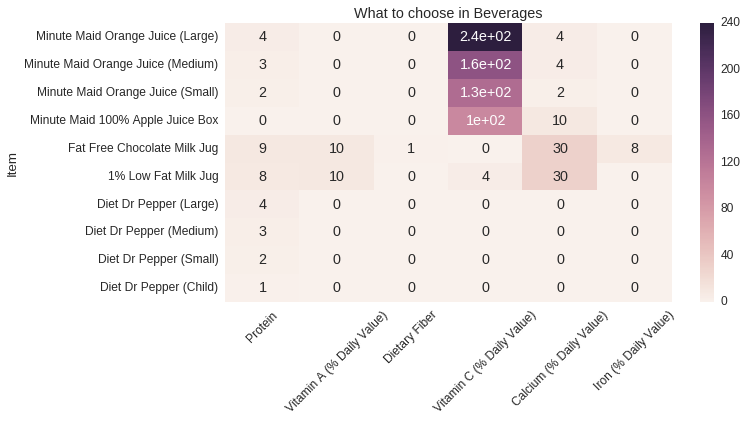

In [129]:
# selecting Beverages category to show neutricious food

df = data[data['Category'] == 'Beverages']
df = df.groupby(['Item']).sum().sort_values(by='neturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[neturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What to choose in Beverages')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

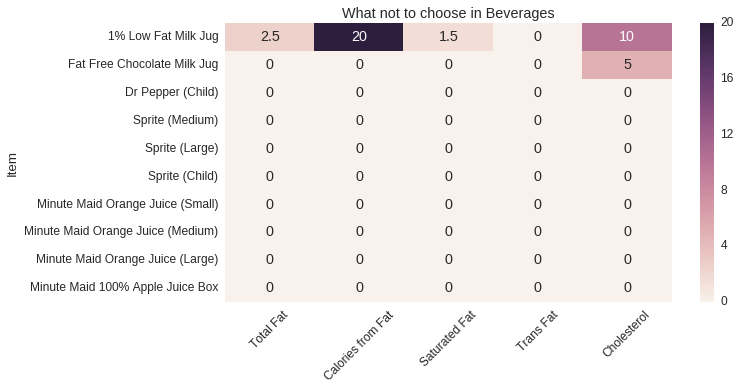

In [130]:
# selecting Beverages category to show non-neutricious food

df = data[data['Category'] == 'Beverages']
df = df.groupby(['Item']).sum().sort_values(by='nonneturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[nonneturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What not to choose in Beverages')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

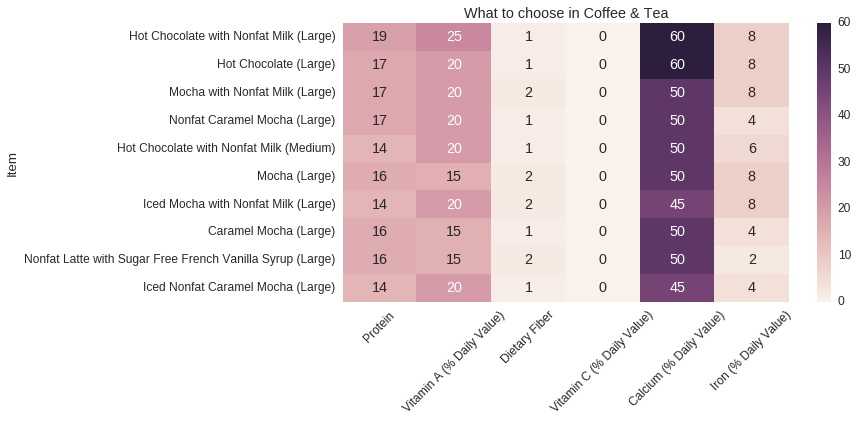

In [133]:
# selecting Coffee & Tea category to show neutricious food

df = data[data['Category'] == 'Coffee & Tea']
# removing this entry for unicode error if any
df = df[~df['Item'].str.contains('Frappé')]
df = df.groupby(['Item']).sum().sort_values(by='neturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[neturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What to choose in Coffee & Tea')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

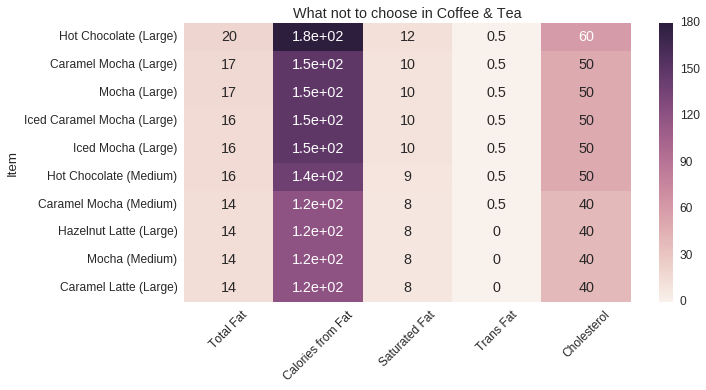

In [134]:
# selecting Coffee & Tea category to show non-neutricious food

df = data[data['Category'] == 'Coffee & Tea']
# removing this entry for unicode error if any
df = df[~df['Item'].str.contains('Frappé')]
df = df.groupby(['Item']).sum().sort_values(by='nonneturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[nonneturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What not to choose in Coffee & Tea')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

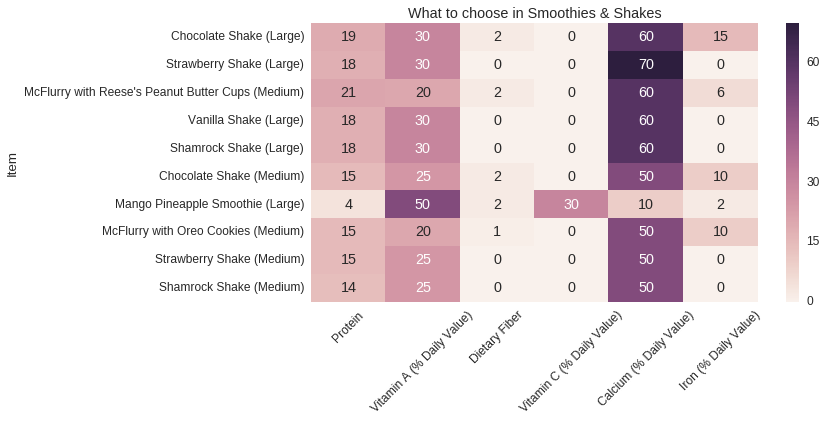

In [135]:
# selecting Smoothies & Shakes category to show neutricious food

df = data[data['Category'] == 'Smoothies & Shakes']
# removing because of encoding issue
df = df[~df.Item.str.contains('M&M\’s')]
df = df.groupby(['Item']).sum().sort_values(by='neturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[neturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What to choose in Smoothies & Shakes')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

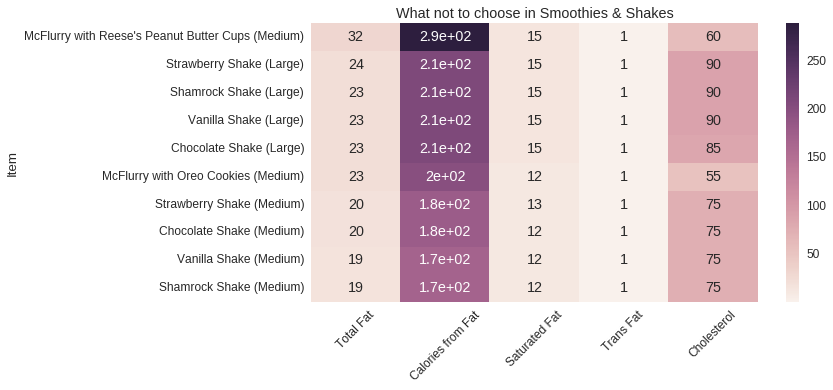

In [136]:
# selecting Smoothies & Shakes category to show non-neutricious food

df = data[data['Category'] == 'Smoothies & Shakes']
# removing because of encoding issue
df = df[~df.Item.str.contains('M&M\’s')]
df = df.groupby(['Item']).sum().sort_values(by='nonneturicious', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
df = df[nonneturicious]
sns.heatmap(df, ax=ax, annot=True)
ax.set_title('What not to choose in Smoothies & Shakes')
plt.xticks(rotation=45)

For the conclusion I would like to say, this analysis may help you better to choose some good items to eat in macd from now. Analysis with categorisation will surely help you to choose healthy food on the right time and right mood. 